# Oblig 1 Maschine learning


In [96]:
# Loads necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Excercise 1
### 1.1 Data exploration
Q1.1.1

In [97]:
# Reads the data from csv file
df=pd.read_csv("WineQT.csv")

In [98]:
# Displays the first 5 rows of the dataframe using the .head() method
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [99]:
df.info() # Dataset information
df.describe() # Dataset statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


#### Q1.1.2
The features that show the highest variation are total sulfur dioxide and free sulfur dioxide.

### 1.2 Correlation analysis
Q1.2.1

In [100]:
df.corr() # Compute pairwise correlation of columns

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


Q1.2.2

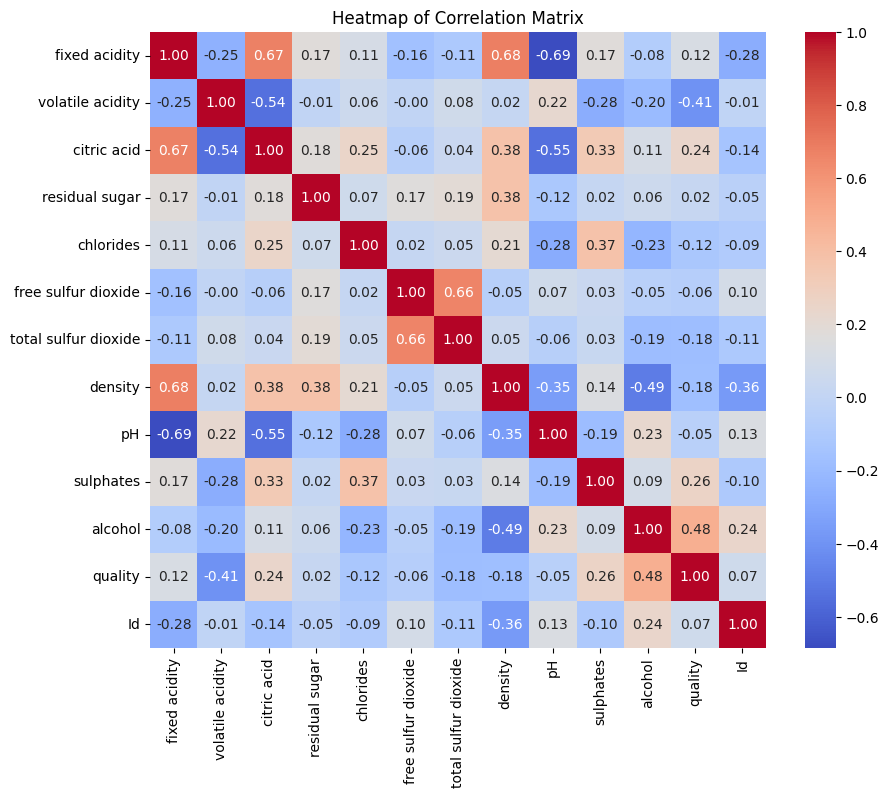

In [101]:
# Plots a heatmap of the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Heatmap of Correlation Matrix")
plt.show()

#### Q1.2.3
The feature that has the highest positive correlation with quality is alcohol.
The feature that has the highest negative correlation is volatile acidity

#### Q1.2.4


### 1.3 Linear regression

Q1.3.1

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
# Fit a simple linear regression model (using gradient descent) using only 'chlorides' to predict 'quality'
X_chlorides = df[['chlorides']]
y_quality = df['quality']


# Reshape X to be a 2D array if necessary
X = X_chlorides.values.reshape(-1, 1)
y = y_quality.values

# Normalize X for faster convergence
X = (X - np.mean(X)) / np.std(X)

# Initialize parameters
m = 0.0  # slope
b = 0.0  # intercept
learning_rate = 0.01
n_epochs = 1000
n = len(X)

# Gradient descent
for epoch in range(n_epochs):
    y_pred = m * X.flatten() + b
    error = y_pred - y

    # Gradients
    dm = (2/n) * np.dot(error, X.flatten())
    db = (2/n) * np.sum(error)

    # Update parameters
    m -= learning_rate * dm
    b -= learning_rate * db


print("\nFinal parameters:")
print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")

m_chloride = m
b_chloride = b


Final parameters:
Slope (m): -0.09994657412031588
Intercept (b): 5.657042860120676


Q1.3.2

In [104]:
# Fit a simple linear regression model using only 'alcohol' to predict 'quality'
X_alcohol = df[['alcohol']]
# Assuming X_chloride and y_quality are numpy arrays
# Reshape X to be a 2D array if necessary
X = X_alcohol.values.reshape(-1, 1)
y = y_quality.values

# Normalize X for faster convergence
X = (X - np.mean(X)) / np.std(X)

# Initialize parameters
m = 0.0  # slope
b = 0.0  # intercept
learning_rate = 0.01
n_epochs = 1000
n = len(X)

# Gradient descent
for epoch in range(n_epochs):
    y_pred = m * X.flatten() + b
    error = y_pred - y

    # Gradients
    dm = (2/n) * np.dot(error, X.flatten())
    db = (2/n) * np.sum(error)

    # Update parameters
    m -= learning_rate * dm
    b -= learning_rate * db


print("\nFinal parameters:")
print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")

m_alcohol = m
b_alcohol = b


Final parameters:
Slope (m): 0.39054599520140326
Intercept (b): 5.657042860120676


Q1.3.3

In [105]:
# Report the regression coefficient and intercept and compare both the models
print("Gradient Descent Model (quality ~ chlorides):")
print(f"  Coefficient: {m_chloride}")
print(f"  Intercept: {b_chloride}")

print("\nGradient Descent Model (quality ~ alcohol):")
print(f"  Coefficient: {m_alcohol}")
print(f"  Intercept: {b_alcohol}")


Gradient Descent Model (quality ~ chlorides):
  Coefficient: -0.09994657412031588
  Intercept: 5.657042860120676

Gradient Descent Model (quality ~ alcohol):
  Coefficient: 0.39054599520140326
  Intercept: 5.657042860120676


Q1.3.4
The regression lines for the two different models do not fit the datapoints very well the regression line can not predict the qaulity of the wine in a satisfactory manner and there is a wide gap between the actual values and the predicted values.

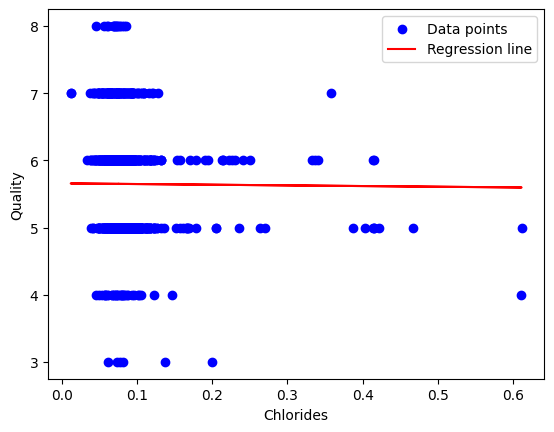

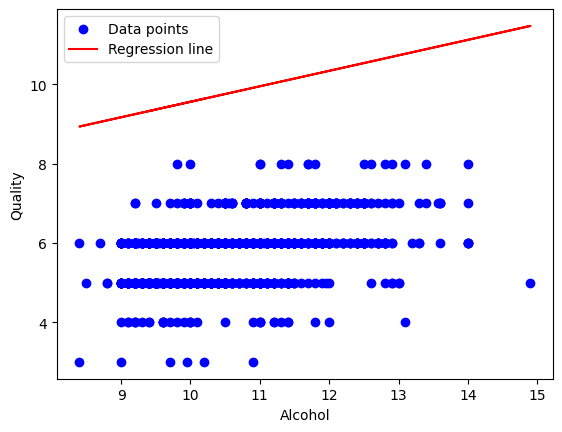

In [106]:
# Plot the regression line of chlorides
plt.scatter(X_chlorides, y_quality, color='blue', label='Data points')
plt.plot(X_chlorides, m_chloride * X_chlorides + b_chloride, color='red', label='Regression line')
plt.xlabel('Chlorides')
plt.ylabel('Quality')
plt.legend()
plt.show()

# Plot the regression line of alcohol
plt.scatter(X_alcohol, y_quality, color='blue', label='Data points')
plt.plot(X_alcohol, m_alcohol * X_alcohol + b_alcohol, color='red', label='Regression line')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.legend()
plt.show()

### 1.4 Train-test split

In [107]:
from sklearn.model_selection import KFold, train_test_split
# Split the dataset into training and testing sets (80% train, 20% test) in 5 different folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(df):
    X_train, X_test = df.drop(columns=['quality']).iloc[train_index], df.drop(columns=['quality']).iloc[test_index]
    y_train, y_test = df['quality'].iloc[train_index], df['quality'].iloc[test_index]


#### Q1.4.1

In [108]:
# Train the simple linear regression model (using gradient descent) for each split 
# on the train-test data in each fold. Evaluate the model on the test set in each fold using:
# • Mean Squared Error (MSE)
# • Root Mean Squared Error (RMSE)
# • R2 score

# How well does alcohol alone predict wine quality in each split?

from sklearn.metrics import mean_squared_error, r2_score
for fold, (train_index, test_index) in enumerate(kf.split(df), 1):
    X_train, X_test = df[['alcohol']].iloc[train_index], df[['alcohol']].iloc[test_index]
    y_train, y_test = df['quality'].iloc[train_index], df['quality'].iloc[test_index]

    # Normalize X for faster convergence
    X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
    X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)  # Use train mean and std for test set

    # Initialize parameters
    m = 0.0  # slope
    b = 0.0  # intercept
    learning_rate = 0.01
    n_epochs = 1000
    n = len(X_train_norm)

    # Gradient descent
    for epoch in range(n_epochs):
        y_pred_train = m * X_train_norm.values.flatten() + b
        error = y_pred_train - y_train.values

        # Gradients
        dm = (2/n) * np.dot(error, X_train_norm.values.flatten())
        db = (2/n) * np.sum(error)

        # Update parameters
        m -= learning_rate * dm
        b -= learning_rate * db

    # Predictions on the test set
    y_pred_test = m * X_test_norm.values.flatten() + b

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_test)

    print(f"Fold {fold}:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2: {r2:.4f}\n")

Fold 1:
MSE: 0.4175
RMSE: 0.6462
R2: 0.2497

Fold 2:
MSE: 0.5900
RMSE: 0.7681
R2: 0.1988

Fold 3:
MSE: 0.5140
RMSE: 0.7169
R2: 0.2415

Fold 4:
MSE: 0.4998
RMSE: 0.7070
R2: 0.2677

Fold 5:
MSE: 0.4632
RMSE: 0.6806
R2: 0.2126



c:\Users\janol\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:4109: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
c:\Users\janol\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:4109: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
c:\Users\janol\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:4109: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes a

#### Q1.4.2

In [109]:
# How well does chloride alone predict wine quality in each split?

for fold, (train_index, test_index) in enumerate(kf.split(df), 1):
    X_train, X_test = df[['chlorides']].iloc[train_index], df[['chlorides']].iloc[test_index]
    y_train, y_test = df['quality'].iloc[train_index], df['quality'].iloc[test_index]

    # Normalize X for faster convergence
    X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
    X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)  # Use train mean and std for test set

    # Initialize parameters
    m = 0.0  # slope
    b = 0.0  # intercept
    learning_rate = 0.01
    n_epochs = 1000
    n = len(X_train_norm)

    # Gradient descent
    for epoch in range(n_epochs):
        y_pred_train = m * X_train_norm.values.flatten() + b
        error = y_pred_train - y_train.values

        # Gradients
        dm = (2/n) * np.dot(error, X_train_norm.values.flatten())
        db = (2/n) * np.sum(error)

        # Update parameters
        m -= learning_rate * dm
        b -= learning_rate * db

    # Predictions on the test set
    y_pred_test = m * X_test_norm.values.flatten() + b

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_test)

    print(f"Fold {fold}:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2: {r2:.4f}\n")

Fold 1:
MSE: 0.5591
RMSE: 0.7478
R2: -0.0048

Fold 2:
MSE: 0.7266
RMSE: 0.8524
R2: 0.0133

Fold 3:
MSE: 0.6591
RMSE: 0.8118
R2: 0.0274

Fold 4:
MSE: 0.6658
RMSE: 0.8160
R2: 0.0246

Fold 5:
MSE: 0.5916
RMSE: 0.7692
R2: -0.0057



c:\Users\janol\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:4109: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
c:\Users\janol\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:4109: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
c:\Users\janol\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:4109: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes a

#### Q1.4.3
It seems like the models both underfit because both the R2 score and the MSE are low. This indicates that the models are underfitted as they dont get answers that are much better than the average. Especially the model that is trained using the chlorides variable. The alcohol model is a bit better as the R2 score is around 0.2 instead of the other models 0.0. 

#### Q1.4.4
Fold 1: 
|Alcohol|Chloride|
|-----|----|
|MSE: 0.4175|MSE: 0.5591|
|RMSE: 0.6462|RMSE: 0.7478|
|R2: 0.2497|R2: -0.0048|

Fold 2:
|Alcohol|Chloride|
|-----|----|
|MSE: 0.5900|MSE: 0.7266|
|RMSE: 0.7681|RMSE: 0.8524|
|R2: 0.1988|R2: 0.0133|

Fold 3:
|Alcohol|Chloride|
|-----|----|
|MSE: 0.5140|MSE: 0.6591|
|RMSE: 0.7169|RMSE: 0.8118|
|R2: 0.2415|R2: 0.0274|

Fold 4:
|Alcohol|Chloride|
|-----|----|
|MSE: 0.4998|MSE: 0.6658|
|RMSE: 0.7070|RMSE: 0.8160|
|R2: 0.2677|R2: 0.0246|

Fold 5:
|Alcohol|Chloride|
|-----|----|
|MSE: 0.4632|MSE: 0.5916|
|RMSE: 0.6806|RMSE: 0.7692|
|R2: 0.2126|R2: -0.0057|


Alcohol performed better in every single fold in regards to all the three different values which means if we were to try to guess quality using linear regression alcohol would be marginally better.


### 1.5 Multiple linear regression
#### Q1.5.1

In [110]:

print("Multiple Linear Regression (All Features):")
for fold, (train_index, test_index) in enumerate(kf.split(df), 1):
    X_train, X_test = df.drop(columns=['quality']).iloc[train_index], df.drop(columns=['quality']).iloc[test_index]
    y_train, y_test = df['quality'].iloc[train_index], df['quality'].iloc[test_index]

    # Fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred_test = model.predict(X_test)

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_test)

    print(f"Fold {fold}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R2: {r2:.4f}\n")

Multiple Linear Regression (All Features):
Fold 1:
  MSE: 0.3824
  RMSE: 0.6184
  R2: 0.3128

Fold 2:
  MSE: 0.4836
  RMSE: 0.6954
  R2: 0.3434

Fold 3:
  MSE: 0.4320
  RMSE: 0.6573
  R2: 0.3625

Fold 4:
  MSE: 0.4095
  RMSE: 0.6400
  R2: 0.4000

Fold 5:
  MSE: 0.3776
  RMSE: 0.6145
  R2: 0.3580



#### Q1.5.2
The multiple linear regression model performed better than both of the different singular linear regression models. The model has a higher average R2 value which means it performs better at guessing the correct quality from the different features. The MSE and RMSE values are lower on average than both the models which proves it is closer to a good fit. 

#### Q1.5.3

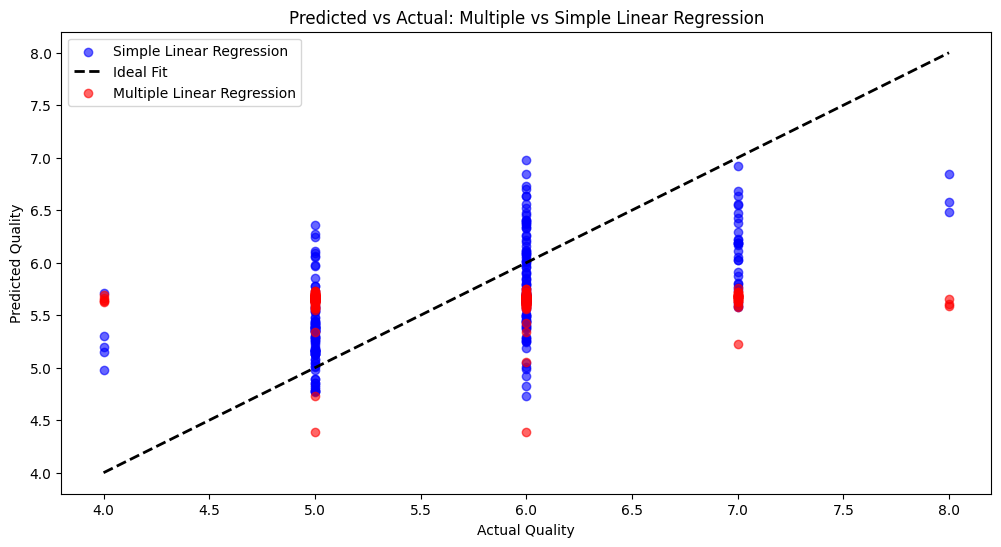